In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df[df.duplicated()]# No duplicated items are available in the dataset

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


<AxesSubplot:>

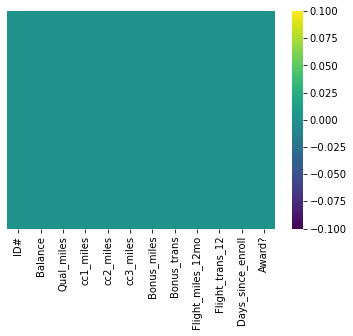

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")#No missing values are there in the dataset


In [5]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [6]:
df["cc2_miles"].unique()

array([1, 2, 3], dtype=int64)

In [7]:
df["Award?"].unique()

array([0, 1], dtype=int64)

In [8]:
# Here we see "cc2_miles" and "Award?" are not required to normalize its scale because it already in between [-3,3], 
#But other all columns are necessary to normalize its scale

In [9]:
df=df.drop('ID#',axis=1)
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


### Feature scaling to the given dataset

In [10]:
def normal_scale(value):
    return((value-value.mean())/(value.std()))

In [11]:
df_scale=normal_scale(df[['Balance', 'Qual_miles', 'cc1_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll']])

In [12]:
df_new=df_scale
df_new["Award?"]=df["Award?"]
df_new["cc2_miles"]=df["cc2_miles"]


In [13]:
df_new.head()

,Balance,Qual_miles,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc2_miles
0,-0.451084,-0.186275,-0.769482,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,0,1
1,-0.539389,-0.186275,-0.769482,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,0,1
2,-0.319991,-0.186275,-0.769482,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,0,1
3,-0.583726,-0.186275,-0.769482,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,0,1
4,0.239648,-0.186275,1.409295,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1,1


In [14]:
df_new.describe()

,Balance,Qual_miles,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc2_miles
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3999.000000,3999.000000
mean,6.948958e-17,2.492380e-16,-8.832867e-15,6.892947e-16,-1.364972e-15,1.126492e-15,2.238353e-16,1.806743e-15,-2.001733e-15,0.370343,1.014504
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.482957,0.147650
min,-7.303482e-01,-1.862754e-01,-7.694822e-01,-6.275873e-02,-7.099031e-01,-1.208052e+00,-3.285622e-01,-3.621226e-01,-1.993361e+00,0.000000,1.000000
25%,-5.464993e-01,-1.862754e-01,-7.694822e-01,-6.275873e-02,-6.581453e-01,-8.956758e-01,-3.285622e-01,-3.621226e-01,-8.660740e-01,0.000000,1.000000
50%,-3.026954e-01,-1.862754e-01,-7.694822e-01,-6.275873e-02,-4.129792e-01,4.145225e-02,-3.285622e-01,-3.621226e-01,-1.092393e-02,0.000000,1.000000
75%,1.865795e-01,-1.862754e-01,6.830357e-01,-6.275873e-02,2.755854e-01,5.620789e-01,-1.064525e-01,-9.849101e-02,8.096037e-01,1.000000,1.000000
max,1.618681e+01,1.422308e+01,2.135554e+00,2.042477e+01,1.020829e+01,7.746727e+00,2.168029e+01,1.361035e+01,2.022842e+00,1.000000,3.000000


In [15]:
df_new.corr()

,Balance,Qual_miles,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc2_miles
Balance,1.000000,0.108722,0.338344,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494,-0.008804
Qual_miles,0.108722,1.000000,0.007931,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256,-0.013923
cc1_miles,0.338344,0.007931,1.000000,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457,-0.068223
cc3_miles,0.035243,-0.007779,0.060555,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484,-0.006166
Bonus_miles,0.403487,0.031021,0.825200,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506,-0.003969
Bonus_trans,0.324935,0.050725,0.608943,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893,0.064399
Flight_miles_12mo,0.217551,0.126774,0.037370,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715,0.010598
Flight_trans_12,0.255700,0.144004,0.041333,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909,0.028284
Days_since_enroll,0.263129,0.017312,0.230849,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121,-0.005807
Award?,0.178494,0.095256,0.335457,0.023484,0.373506,0.333893,0.217715,0.247909,0.188121,1.000000,0.005332


<AxesSubplot:>

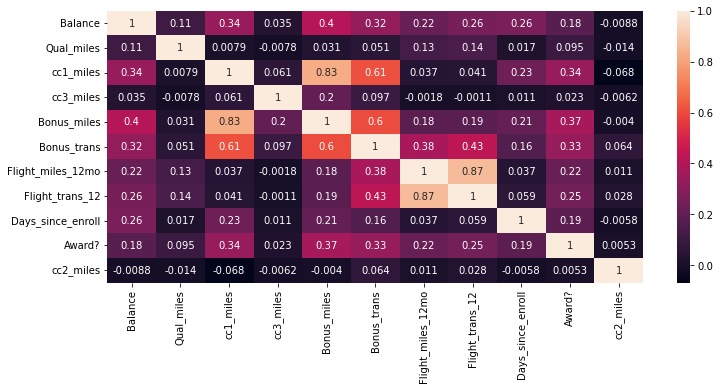

In [16]:
plt.figure(figsize=(12,5))
sns.heatmap(df_new.corr(),annot=True)

In [17]:
df_new["Award?"].unique()

array([0, 1], dtype=int64)

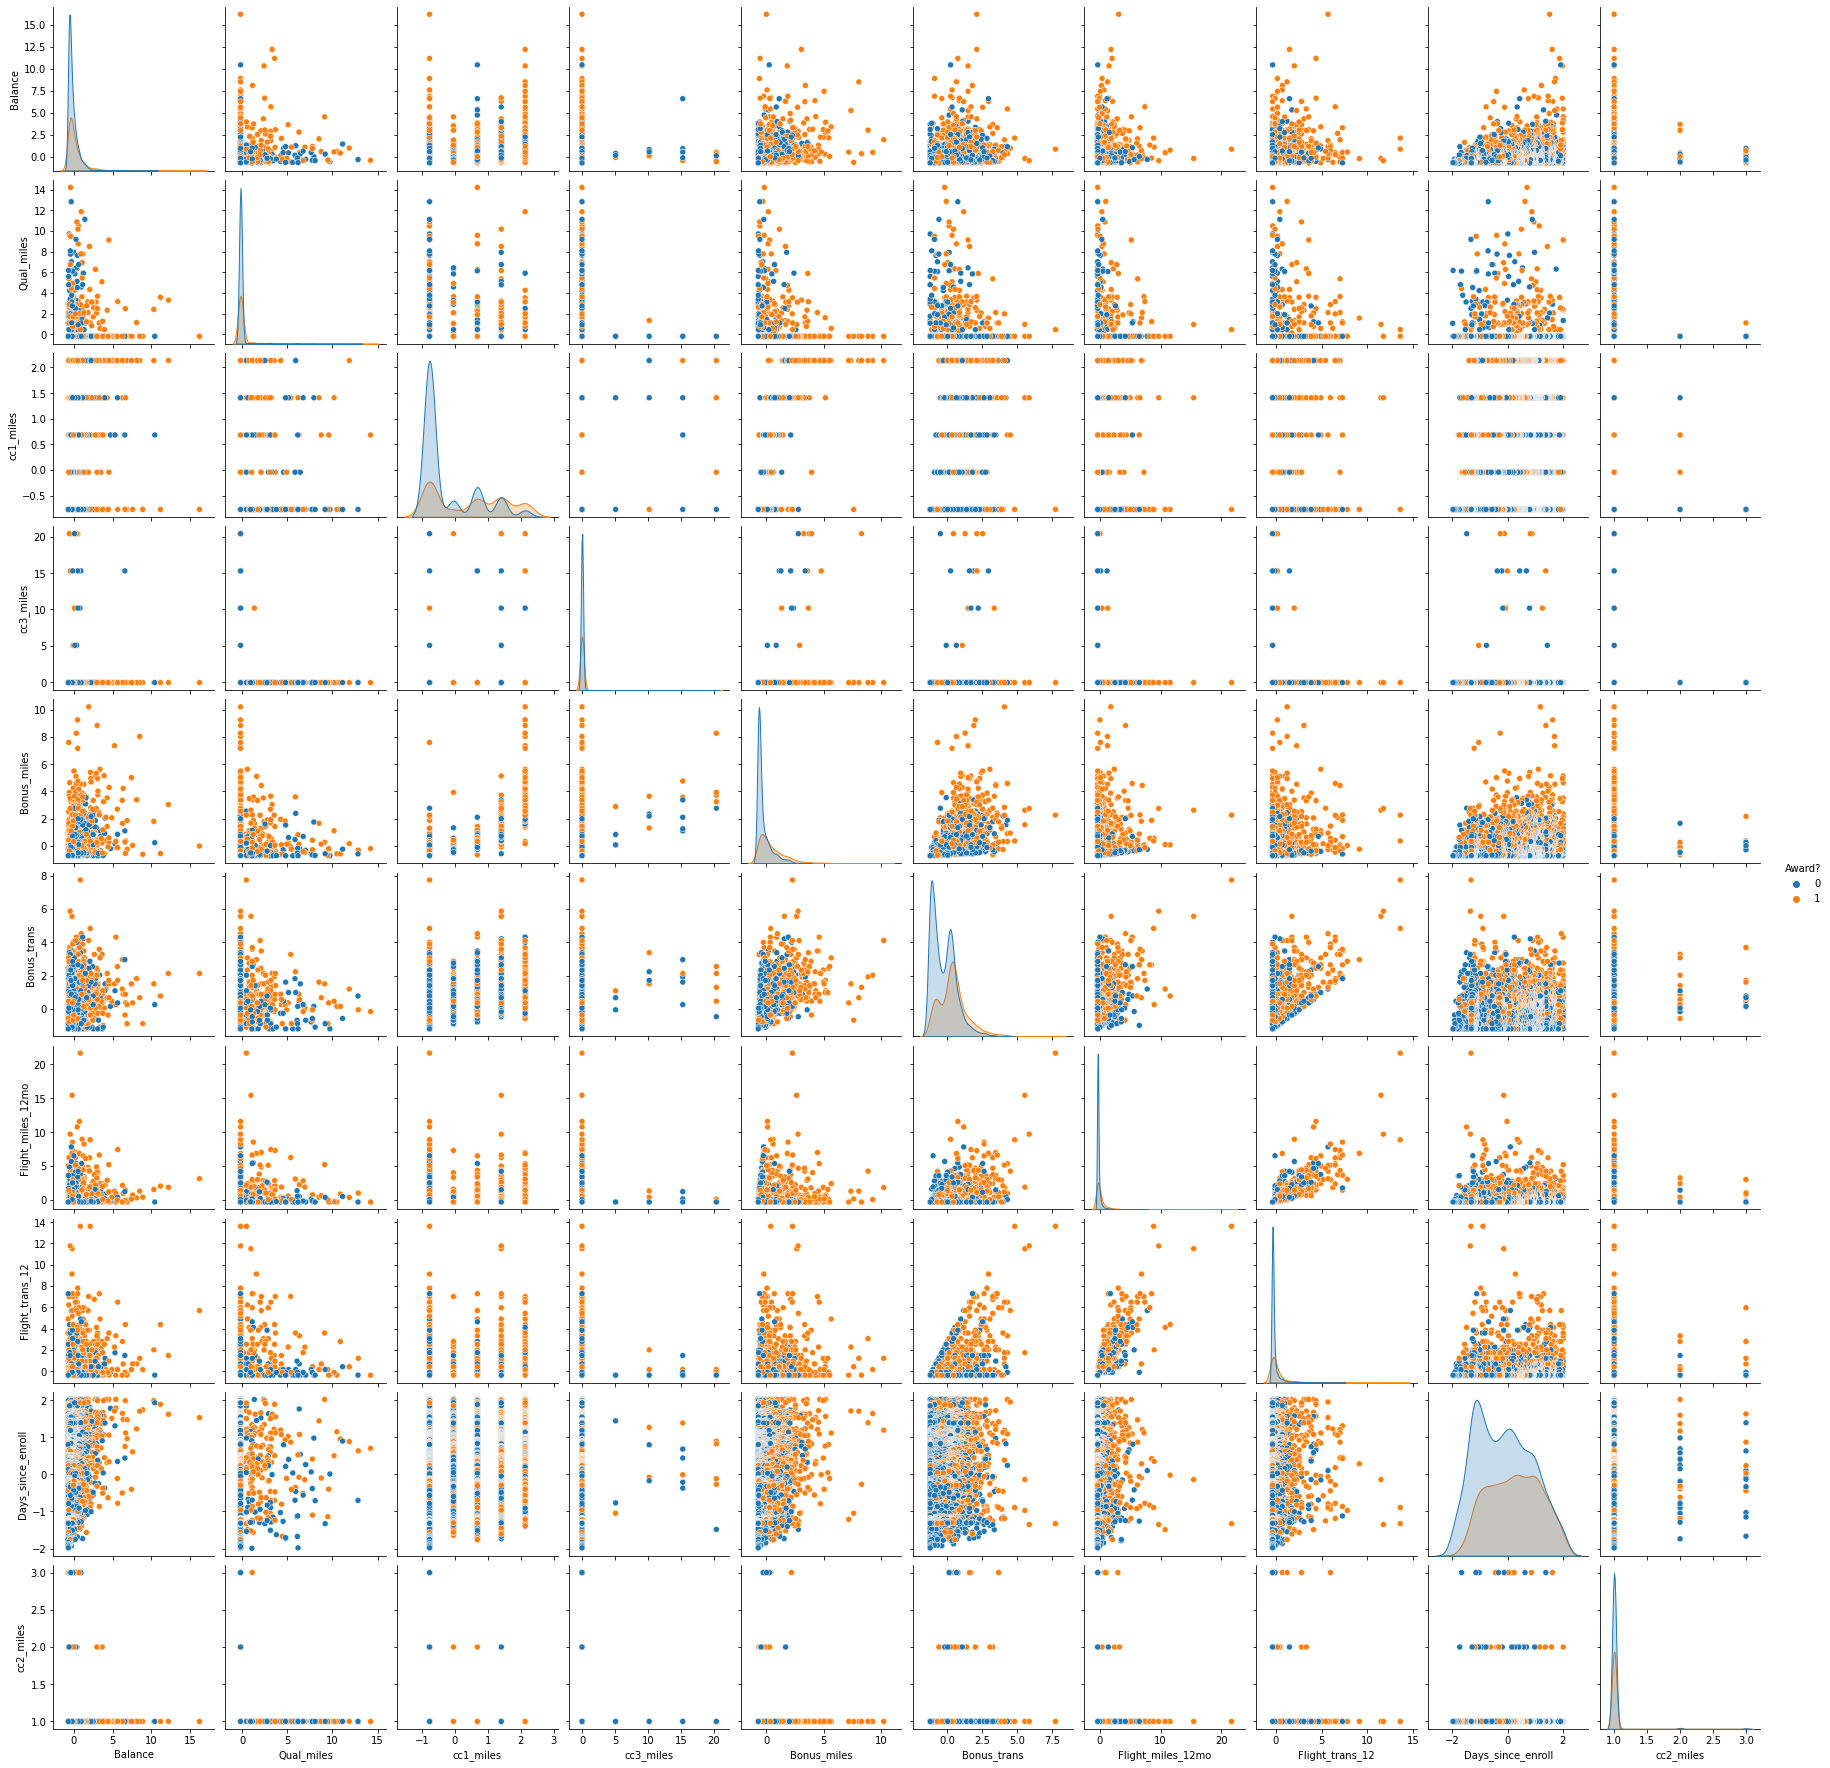

In [18]:
sns.pairplot(df_new,hue="Award?")

## Hierarchical clustering

In [19]:
from scipy.spatial import distance_matrix

In [20]:
df_new.head()

,Balance,Qual_miles,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc2_miles
0,-0.451084,-0.186275,-0.769482,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,0,1
1,-0.539389,-0.186275,-0.769482,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,0,1
2,-0.319991,-0.186275,-0.769482,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,0,1
3,-0.583726,-0.186275,-0.769482,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,0,1
4,0.239648,-0.186275,1.409295,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1,1


##### Dendogram

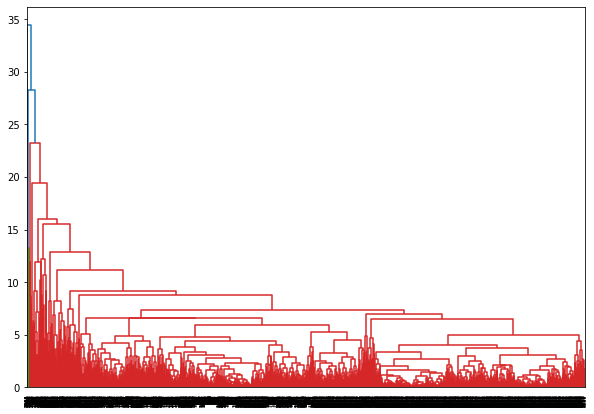

In [21]:
linked=linkage(df_new,"complete")
plt.figure(figsize=(10, 7))  
dendrogram(linked)
plt.show()

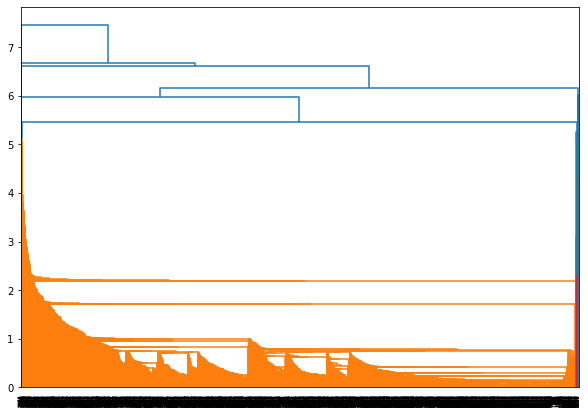

In [22]:
linked1=linkage(df_new,"single")
plt.figure(figsize=(10, 7))  
dendrogram(linked1)
plt.show()

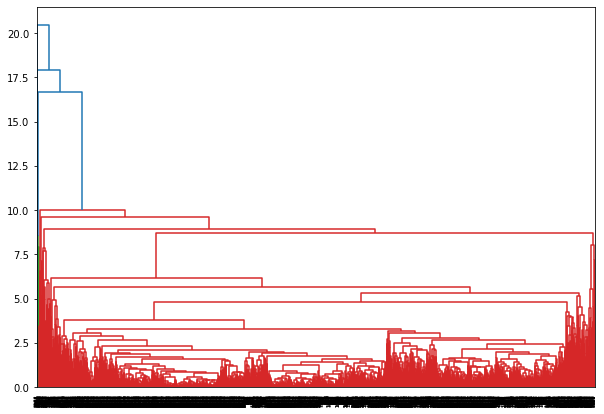

In [23]:
linked2=linkage(df_new,"average")
plt.figure(figsize=(10, 7))  
dendrogram(linked2)
plt.show()

### Agglomerative clustering

In [43]:
k=4# lets assume Number of cluster

In [25]:
hclustering=AgglomerativeClustering(n_clusters=k,affinity="euclidean",linkage="complete")
hclustering.fit(df_new)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [26]:
hclustering.fit_predict(df_new)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
print(hclustering.labels_)

[0 0 0 ... 0 0 0]


In [28]:
df_new["agglo_label"]=hclustering.labels_
df_new.head()

,Balance,Qual_miles,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc2_miles,agglo_label
0,-0.451084,-0.186275,-0.769482,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,0,1,0
1,-0.539389,-0.186275,-0.769482,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,0,1,0
2,-0.319991,-0.186275,-0.769482,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,0,1,0
3,-0.583726,-0.186275,-0.769482,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,0,1,0
4,0.239648,-0.186275,1.409295,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1,1,0


In [29]:
df_new["agglo_label"].unique()

array([0, 2, 3, 1], dtype=int64)

## K-means clustering

### Using elbow method to find the k values

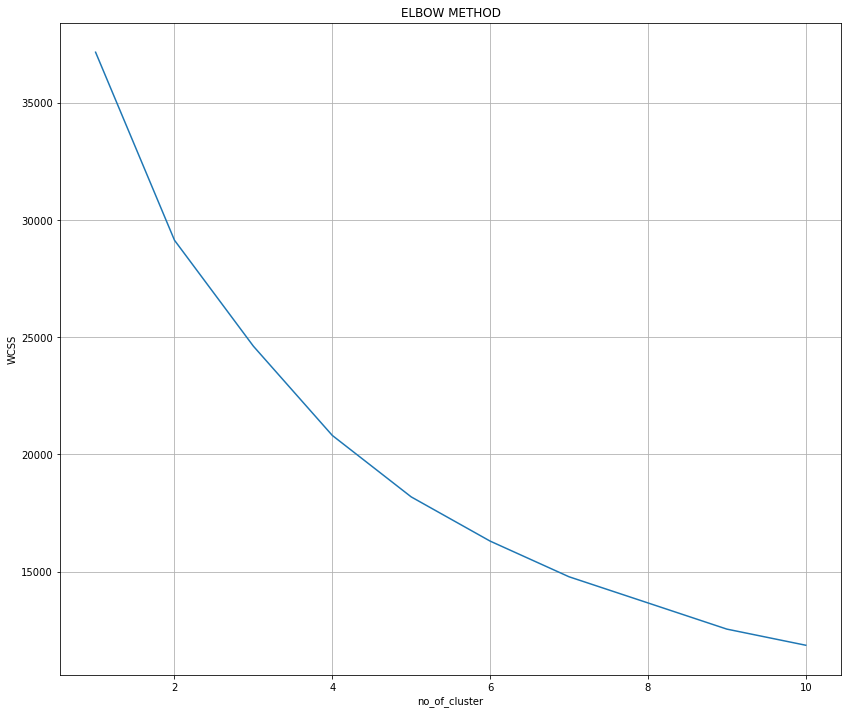

In [30]:
from sklearn.cluster import KMeans
plt.figure(figsize=(14,12))
wcss=[]
for i in range(1,11):
    kmean_mod=KMeans(n_clusters=i, random_state=0)
    model=kmean_mod.fit(df_new)
    wcss.append(model.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel("no_of_cluster")
plt.ylabel("WCSS")
plt.title("ELBOW METHOD")
plt.grid()
plt.show()

In [31]:
k=5# here number of cluster
model=KMeans(n_clusters=5,random_state=0)
kmeans_model=model.fit(df_new)
kmeans_model

KMeans(n_clusters=5, random_state=0)

In [32]:
kmeans_model.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [33]:
predict=kmeans_model.predict(df_new)
centroids=kmeans_model.cluster_centers_#Cluster centroid

In [34]:
df_new["cluster_label"]=kmeans_model.labels_

In [35]:
df_new.groupby('cluster_label').agg(['mean']).reset_index()

,cluster_label,Balance,Qual_miles,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc2_miles,agglo_label
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.170142,0.410724,0.125906,-0.062759,0.657551,1.748823,3.724981,4.025718,0.289620,0.780822,1.041096,0.130137
1,1,0.639639,-0.084422,1.021957,15.644343,3.179294,1.714399,0.033289,0.059688,0.239843,0.533333,1.000000,2.000000
2,2,-0.309775,-0.125133,-0.647454,-0.060675,-0.532869,-0.514419,-0.177349,-0.191588,-0.198522,0.232710,1.019935,0.000000
3,3,0.433883,6.852060,-0.018604,-0.062759,0.079283,0.073219,0.361189,0.397494,-0.118021,0.542373,1.000000,0.000000
4,4,0.420433,-0.117634,1.180037,-0.055004,0.879199,0.741165,-0.098209,-0.106873,0.339931,0.571537,1.002271,0.011355


In [36]:
df_new

,Balance,Qual_miles,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc2_miles,agglo_label,cluster_label
0,-0.451084,-0.186275,-0.769482,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,0,1,0,2
1,-0.539389,-0.186275,-0.769482,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,0,1,0,2
2,-0.319991,-0.186275,-0.769482,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,0,1,0,2
3,-0.583726,-0.186275,-0.769482,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,0,1,0,2
4,0.239648,-0.186275,1.409295,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1,1,0,2
3995,-0.091454,-0.186275,-0.769482,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1,1,0,2
3996,-0.000043,-0.186275,0.683036,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1,1,0,2
3997,-0.185584,-0.186275,-0.769482,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,0,1,0,2


In [37]:
df_new["cluster_label"].unique()#Naming of five cluster

array([2, 4, 0, 3, 1])

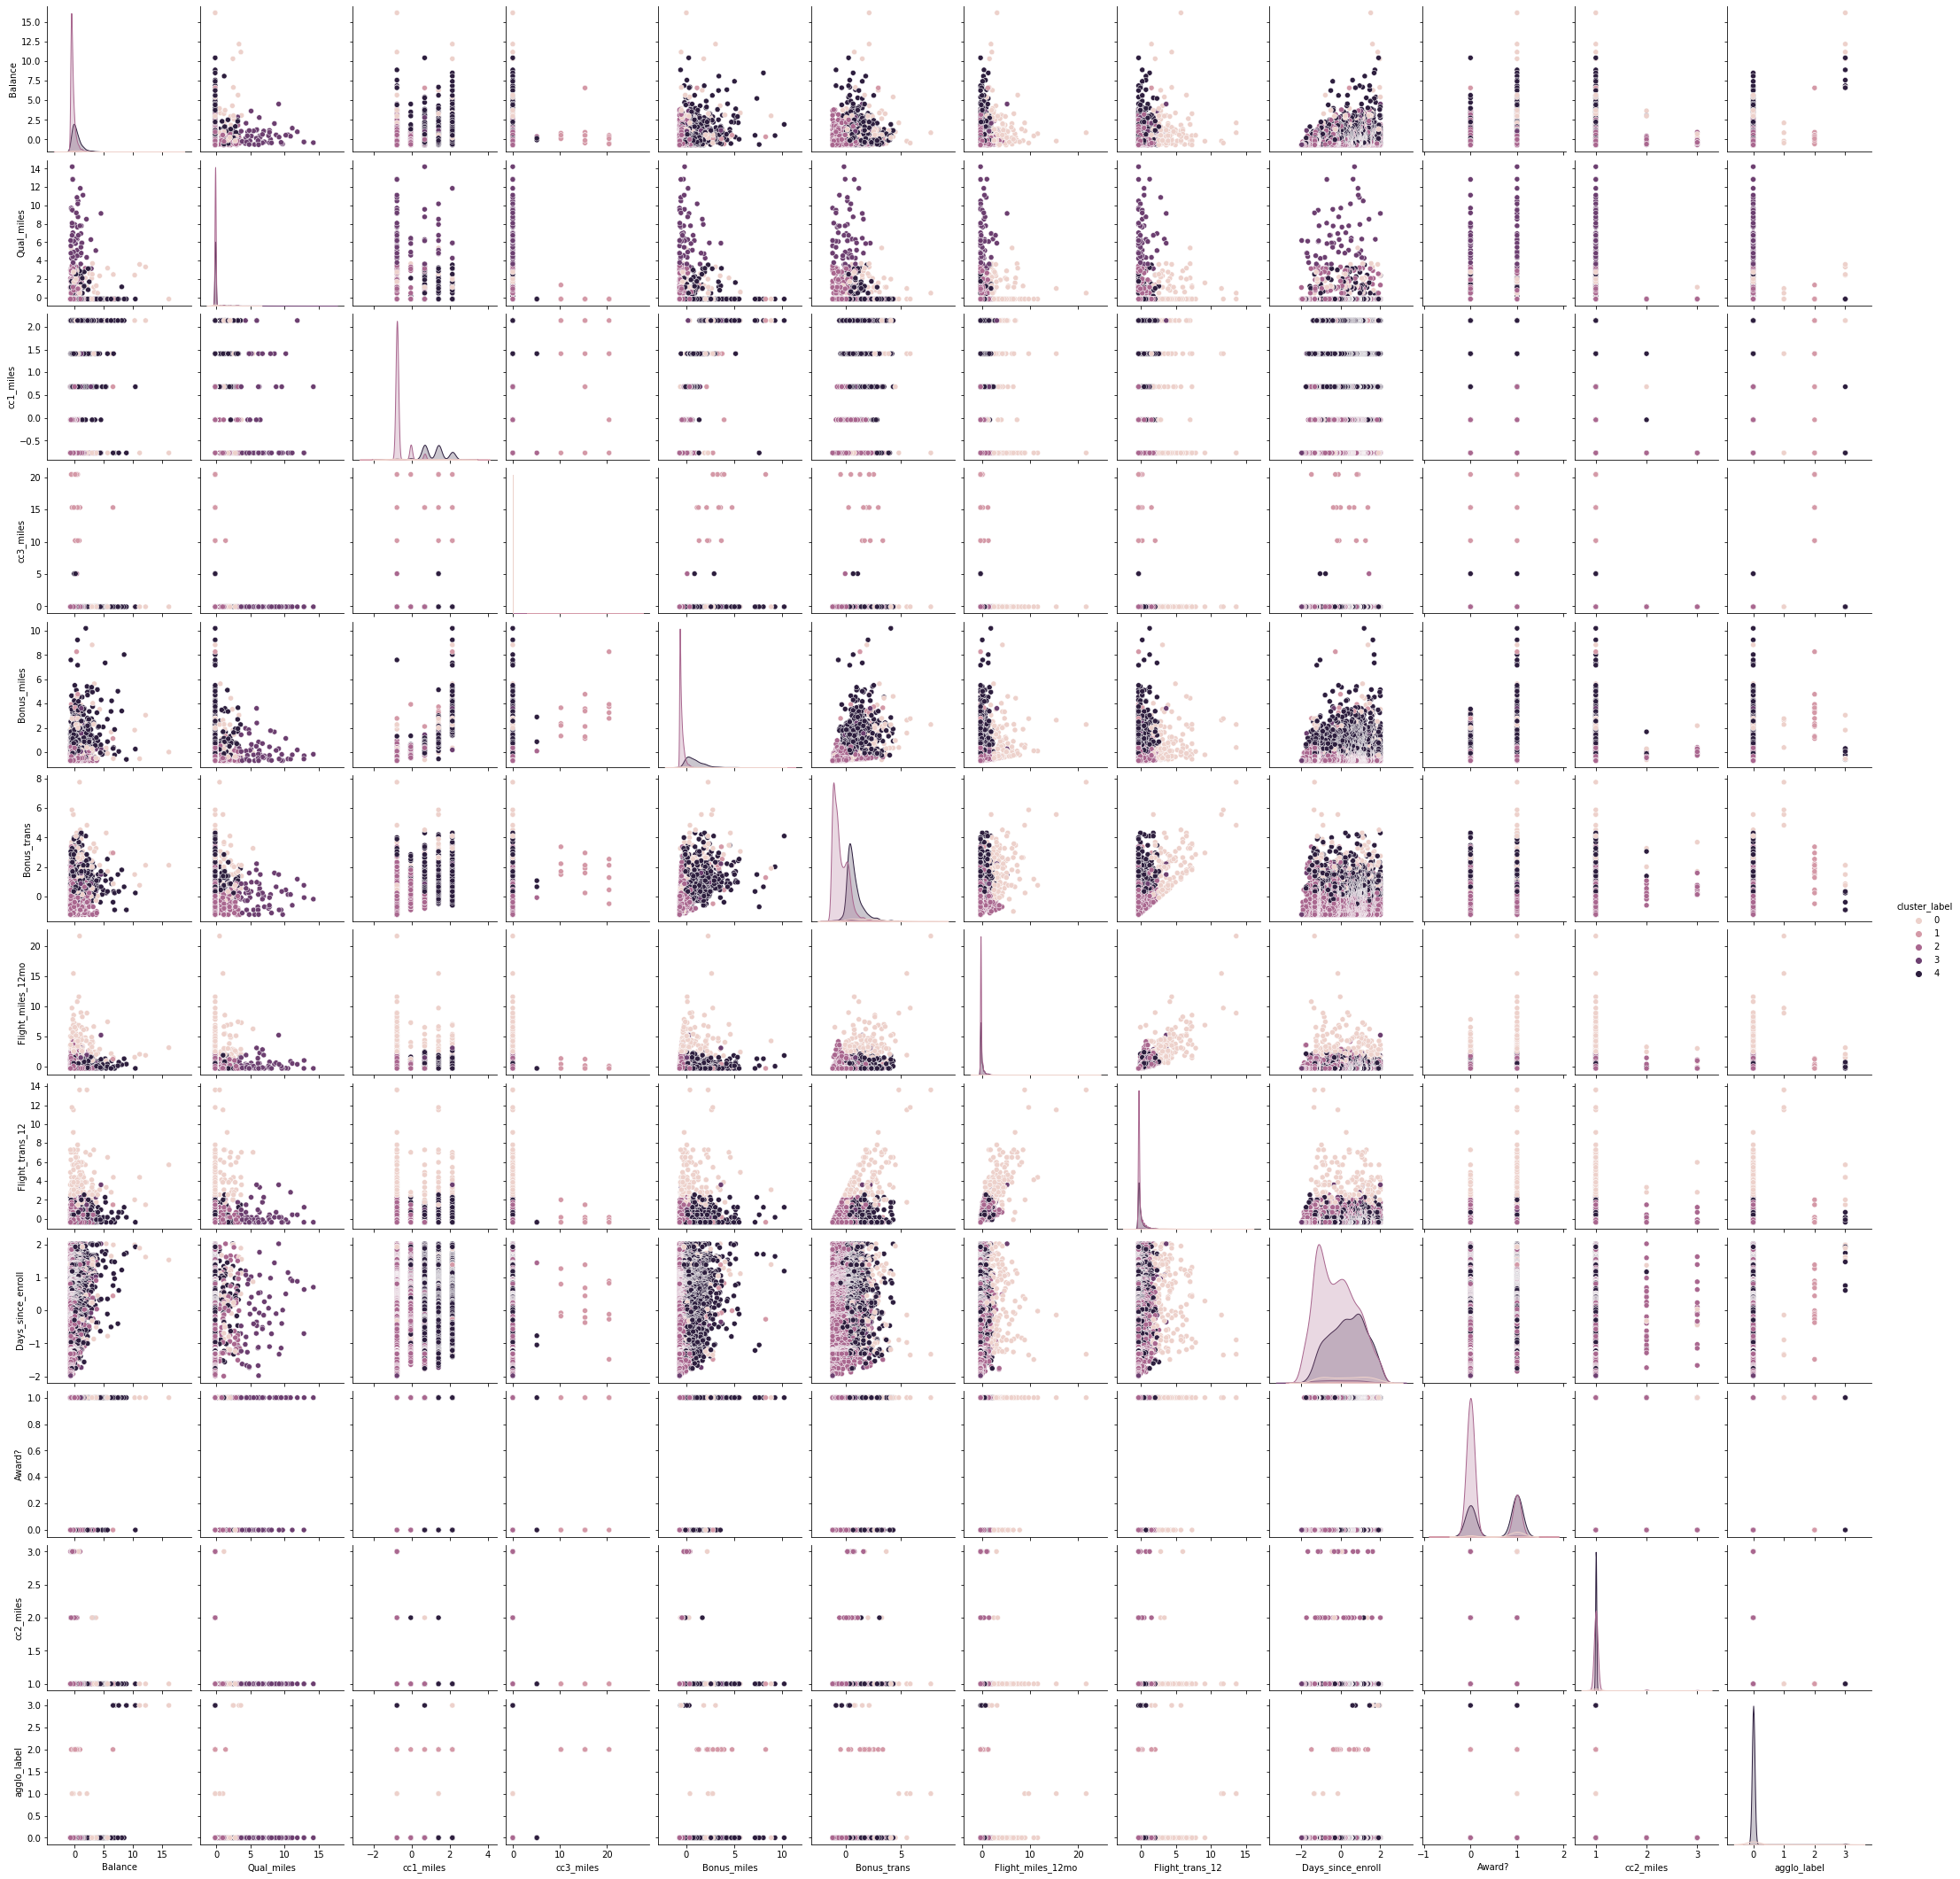

In [38]:
sns.pairplot(df_new,hue="cluster_label")

# DBSCAN 

In [39]:
from sklearn.cluster import DBSCAN


In [52]:
df_new.shape

(3999, 14)

### min_point>=D+1(WHERE D IS THE DIMENSION OF THE DATASET)
#here D= 
* min split>14+1
*Epsilon should me chosen as small as possible

In [53]:
dbscan=DBSCAN(eps=0.74,min_samples=16)
dbscan.fit(df_new)
r=dbscan.labels_
d=pd.DataFrame(r)
d1=d.rename({0:"Label"},axis=1)
d1.head()

,Label
0,0
1,0
2,0
3,0
4,-1


#### Noisy sample are labeled as -1

In [54]:
df_new["dbscan_label"]=dbscan.labels_
df_new.head()

,Balance,Qual_miles,cc1_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc2_miles,agglo_label,cluster_label,dbscan_label
0,-0.451084,-0.186275,-0.769482,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,0,1,0,2,0
1,-0.539389,-0.186275,-0.769482,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,0,1,0,2,0
2,-0.319991,-0.186275,-0.769482,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,0,1,0,2,0
3,-0.583726,-0.186275,-0.769482,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,0,1,0,2,0
4,0.239648,-0.186275,1.409295,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1,1,0,4,-1


In [59]:
df_new["dbscan_label"].value_counts()

 0    1681
-1    1196
 1     396
 5     212
 2     177
 3     170
 4     141
 6      26
Name: dbscan_label, dtype: int64

In [56]:
len(df_new[df_new["dbscan_label"]==-1])/len(df_new)#Here we see there is a noisy label i.e; -1 is 29% so epsilon value is good

0.29907476869217303